<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Study-Description" data-toc-modified-id="Study-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Study Description</a></span></li><li><span><a href="#Librairies" data-toc-modified-id="Librairies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Librairies</a></span></li><li><span><a href="#Data-cleaning" data-toc-modified-id="Data-cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data cleaning</a></span><ul class="toc-item"><li><span><a href="#Table-1" data-toc-modified-id="Table-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Table 1</a></span></li></ul></li><li><span><a href="#Fig---Behavioral-opportunities" data-toc-modified-id="Fig---Behavioral-opportunities-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fig - Behavioral opportunities</a></span></li><li><span><a href="#Generating-Table---Occupant-Sample-Characteristics" data-toc-modified-id="Generating-Table---Occupant-Sample-Characteristics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generating Table - Occupant Sample Characteristics</a></span></li></ul></div>

# Study Description

45 occupant responses. 
24 occupants was selected for participation in the full longitudinal study using a non-proportionate quota sampling strategy.

TOPICS
- energy consumption
- Indoor Environmental Quality

LEADING TO SIGNIFICANT ATTENTION IN 
- building design
- operation processes

TARGETS
- The general frequency of thermally adaptive behaviors in a field office environment.
- Temporal dynamics in thermal comfort and behavior, within a day and across all four seasons.
- The relative effectiveness of indoor and outdoor temperature in describing the probability of a given behavioral state.

ADDITIONALE TARGETS
- Long-term comfort and behavior in an air-conditioned office building located in a dense urban context and subtropical climate with hot, humid summers and cold winters.
- Direct consideration of personal thermal acceptability ranges as they relate to inter-individual variation in thermal comfort and behavior.
- The sequencing/hierarchy of available behavioral actions.
- Social restrictions on behavior and other reasons that occupants may not take available adaptive actions.
- Analysis of high-resolution datalogger information on personal fan/heater use as well as on windows.

# Librairies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib.colors import Normalize
import matplotlib.cm as cm

# Data cleaning

In [2]:
df=pd.read_csv(r'../OccupantBehaviorEnvironmentData/data/Data_ColNamed.csv', sep='/')

In [3]:
df.head()

,Unnamed: 0,0_time,0_occupant_nb,0_occupancy_1,0_occupancy_2,0_survey_time,1_in_temp,1_in_hum,1_in_air_vel,1_in_rad_temp,...,4_eff_blinds,4_report_dcmft,5_pt_prod,5_pt_cmft_pleas,5_pt_wish,5_pt_others,5_pt_nrg_eff,5_pt_mgmt,5_pt_typ,6_pmv
0,0,735080.000000,1.0,0.0,0.0,NaN,24.584695,63.517,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.270899
1,1,735080.010417,1.0,0.0,0.0,NaN,24.584695,63.704,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.269505
2,2,735080.020833,1.0,0.0,0.0,NaN,24.584695,63.856,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.268373
3,3,735080.031250,1.0,0.0,0.0,NaN,24.584695,64.039,0.030988,24.584695,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.267009
4,4,735080.041667,1.0,0.0,0.0,NaN,24.498384,64.282,0.030988,24.498384,...,0.0,NaN,1.0,1.0,2.0,4.0,2.0,2.0,4.0,-0.297025


In [4]:
# Divide the columns based on category
# Seperate dependent and independent variables TBC if useful
col_general = ['0_time','0_occupant_nb','0_occupancy_1','0_occupancy_2','0_survey_time']

col_env = ['1_in_temp','1_in_hum','1_in_air_vel','1_in_rad_temp','1_in_lum','1_in_co2','1_out_temp','1_out_hum','1_out_air_vel']
              
col_pers_charact = ['2_met_rate_15min','2_met_rate_60min','2_clth_level','2_clth_level_wtchair','2_min_acc_sen','2_med_acc_sen',
              '2_max_acc_sen','2_min_acc','2_med_acc','2_max_acc','2_therm_pref','2_gender','2_age','2_off_type','2_floor_nb',
              '2_loc_floor','2_min_acc_sen_sum','2_min_acc_sen_win','2_med_acc_sen_sum','2_med_acc_sen_win','2_max_acc_sen_sum',
              '2_max_acc_sen_win'] 

col_conf_prod = ['3_gen_th_cmf','3_th_cmf_mvmt','3_dcmf_head','3_dcmf_chest','3_dcmf_back','3_dcmf_pelvis','3_dcmf_arms',
              '3_dcmf_hands','3_dcmf_legs','3_dcmf_feet','3_dcmf_all','3_th_sen','3_th_sen_mvmt','3_rel_busy',
              '3_rel_product','3_gen_satisf_wspace','3_gen_satisf_wpriv','3_gen_th_cmft','3_gen_satisf_wcontrol']

col_behavior = ['4_fan_heat_class','4_state_fan_heat','4_state_window','4_crt_th_cool_spt','4_base_th_cool_spt',
              '4_crt_th_heat_spt','4_base_th_heat_spt','4_clth_change','4_clth_change_up','4_clth_change_down','4_net_clth_change',
              '4_drinking','4_pp_cold_drink','4_pp_warm_drink','4_act_window','4_state_window','4_when_act_window','4_act_door',
              '4_state_door','4_when_act_door','4_act_blinds','4_state_blinds','4_when_act_blinds','4_act_lc_fan','4_state_lc_fan',
              '4_when_act_lc_fan','4_act_lc_heater','4_state_lc_heater','4_when_act_lc_heater','4_act_thermostat','4_state_thermostat',
              '4_when_act_thermostat','4_rsn_no_window','4_rsn_no_door','4_rsn_no_blinds','4_rsn_no_lc_fan','4_rsn_no_lc_heater',
              '4_rsn_no_thermostat','4_avail_clth','4_avail_drinks','4_avail_lc_heater','4_avail_lc_fan','4_avail_thermostat',
              '4_avail_window','4_avail_door','4_avail_blinds','4_eff_clth','4_eff_drinks','4_eff_lc_heater','4_eff_lc_fan',
              '4_eff_thermostat','4_eff_window','4_eff_door','4_eff_blinds','4_report_dcmft']

col_personal_values = ['5_pt_prod','5_pt_cmft_pleas','5_pt_wish','5_pt_others','5_pt_nrg_eff','5_pt_mgmt','5_pt_typ','6_pmv']

#col_target = []

In [5]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations") 
print(get_top_abs_correlations(df,60))

Top Absolute Correlations
4_state_window.1       4_when_act_thermostat    1.000000
4_state_lc_fan         4_when_act_thermostat    1.000000
4_state_window.1       4_state_thermostat       1.000000
4_fan_heat_class       4_state_door             1.000000
4_when_act_lc_fan      4_when_act_thermostat    1.000000
                       4_state_thermostat       1.000000
4_when_act_window      4_when_act_door          1.000000
                       4_when_act_blinds        1.000000
                       4_state_thermostat       1.000000
                       4_when_act_thermostat    1.000000
4_pp_warm_drink        4_when_act_lc_heater     1.000000
4_state_door           4_state_thermostat       1.000000
4_state_window.1       4_when_act_blinds        1.000000
4_state_lc_fan         4_state_thermostat       1.000000
4_pp_warm_drink        4_state_lc_heater        1.000000
4_when_act_door        4_when_act_blinds        1.000000
4_state_window.1       4_when_act_door          1.000000
2_clt

In [6]:
df[col_general].isna().sum()

0_time                0
0_occupant_nb         0
0_occupancy_1         0
0_occupancy_2         0
0_survey_time    838487
dtype: int64

In [7]:
df[col_general].describe()

,0_time,0_occupant_nb,0_occupancy_1,0_occupancy_2,0_survey_time
count,840984.000000,840984.000000,840984.000000,840984.000000,2497.000000
mean,735262.500000,12.500000,0.228208,0.037568,1.971165
std,105.369493,6.922191,0.419677,0.190149,0.811556
min,735080.000000,1.000000,0.000000,0.000000,1.000000
25%,735171.250000,6.750000,0.000000,0.000000,1.000000
50%,735262.499999,12.500000,0.000000,0.000000,2.000000
75%,735353.749999,18.250000,0.000000,0.000000,3.000000
max,735444.999999,24.000000,1.000000,1.000000,3.000000


In [8]:
df[col_env].isna().sum()

1_in_temp         65526
1_in_hum              0
1_in_air_vel          0
1_in_rad_temp     65526
1_in_lum         709696
1_in_co2         766391
1_out_temp        52634
1_out_hum         52634
1_out_air_vel     52634
dtype: int64

In [9]:
df[col_pers_charact].isna().sum()

2_met_rate_15min             0
2_met_rate_60min             0
2_clth_level             29952
2_clth_level_wtchair     29952
2_min_acc_sen                0
2_med_acc_sen                0
2_max_acc_sen                0
2_min_acc                29952
2_med_acc                29952
2_max_acc                29952
2_therm_pref            840418
2_gender                 52380
2_age                    86036
2_off_type               52380
2_floor_nb               52380
2_loc_floor              52380
2_min_acc_sen_sum        52380
2_min_acc_sen_win        52380
2_med_acc_sen_sum        52380
2_med_acc_sen_win        52380
2_max_acc_sen_sum        52380
2_max_acc_sen_win        52380
dtype: int64

In [10]:
df[col_conf_prod].isna().sum()

3_gen_th_cmf             838488
3_th_cmf_mvmt            839074
3_dcmf_head              840956
3_dcmf_chest             840964
3_dcmf_back              840961
3_dcmf_pelvis            840984
3_dcmf_arms              840963
3_dcmf_hands             840963
3_dcmf_legs              840977
3_dcmf_feet              840966
3_dcmf_all               840906
3_th_sen                 838487
3_th_sen_mvmt            839074
3_rel_busy               839593
3_rel_product            839709
3_gen_satisf_wspace       52380
3_gen_satisf_wpriv        52380
3_gen_th_cmft             52380
3_gen_satisf_wcontrol     52380
dtype: int64

In [11]:
df[col_behavior].isna().sum()

4_fan_heat_class         562389
4_state_fan_heat         562389
4_state_window           571519
4_crt_th_cool_spt        133435
4_base_th_cool_spt       470611
4_crt_th_heat_spt        133440
4_base_th_heat_spt       470611
4_clth_change            838487
4_clth_change_up         838487
4_clth_change_down       838487
4_net_clth_change        838487
4_drinking               838487
4_pp_cold_drink          840667
4_pp_warm_drink          840785
4_act_window             838487
4_state_window           571519
4_when_act_window        840956
4_act_door               838487
4_state_door             840911
4_when_act_door          840946
4_act_blinds             838487
4_state_blinds           840954
4_when_act_blinds        840966
4_act_lc_fan             838487
4_state_lc_fan           840851
4_when_act_lc_fan        840913
4_act_lc_heater          838487
4_state_lc_heater        840923
4_when_act_lc_heater     840958
4_act_thermostat         838487
4_state_thermostat       840970
4_when_a

In [12]:
df[col_personal_values].isna().sum()

5_pt_prod          85540
5_pt_cmft_pleas    85540
5_pt_wish          85540
5_pt_others        85540
5_pt_nrg_eff       85540
5_pt_mgmt          85540
5_pt_typ           85540
6_pmv              91233
dtype: int64

## Table 1

In [13]:
df['2_gender'].value_counts()

2.0    530732
1.0    257872
Name: 2_gender, dtype: int64

In [14]:
df['2_off_type'].value_counts()

3.0    334585
1.0    197454
4.0    131155
2.0     93351
5.0     32059
Name: 2_off_type, dtype: int64

# Fig - Behavioral opportunities

In [15]:
# Dataframe copy
df_beh = df[['4_avail_clth','4_avail_drinks','4_avail_lc_heater','4_avail_lc_fan','4_avail_thermostat','4_avail_window','4_avail_door','4_avail_blinds']]
df_beh = df_beh.dropna()
df_beh = df_beh.astype(int)
print(df_beh.dtypes)

# Check
print('Clothing')
print(df_beh['4_avail_clth'].isna().sum())
print(df_beh['4_avail_clth'].value_counts())
print(df_beh['4_avail_clth'].value_counts().sum())
print('Proprotion for 1')
print(round(df_beh['4_avail_clth'].value_counts(normalize=True).mul(1),2))

4_avail_clth          int32
4_avail_drinks        int32
4_avail_lc_heater     int32
4_avail_lc_fan        int32
4_avail_thermostat    int32
4_avail_window        int32
4_avail_door          int32
4_avail_blinds        int32
dtype: object
Clothing
0
4    760731
2     27873
Name: 4_avail_clth, dtype: int64
788604
Proprotion for 1
4    0.96
2    0.04
Name: 4_avail_clth, dtype: float64


In [16]:
# creating adjusted datframe to generate 
df_new = pd.concat([df_beh['4_avail_clth'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_drinks'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_lc_heater'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_lc_fan'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_thermostat'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_window'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_door'].value_counts(normalize=True).mul(1),
                 df_beh['4_avail_blinds'].value_counts(normalize=True).mul(1)],
                axis=1,keys=('Clothing','Drinks','PHeat','PFan','Thermost.','Windows','Doors','Blinds'))

dct={0:'Cannot Do This/Don\'t Know',
     1:'Cannot Do This/Don\'t Know',
     2:'Choose Not To Do This',
     3:'Do This After Consulting Others',
     4:'Do This Whitout Consulting Others'}
df_new = df_new.rename(index=dct)
df_new['Behavior']=df_new.index

df_new = df_new.groupby(['Behavior'], as_index=True).agg('sum').T
df_new = df_new[['Do This Whitout Consulting Others','Do This After Consulting Others',
                 'Choose Not To Do This','Cannot Do This/Don\'t Know']]

<ipython-input-17-dd93066e1aa0>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


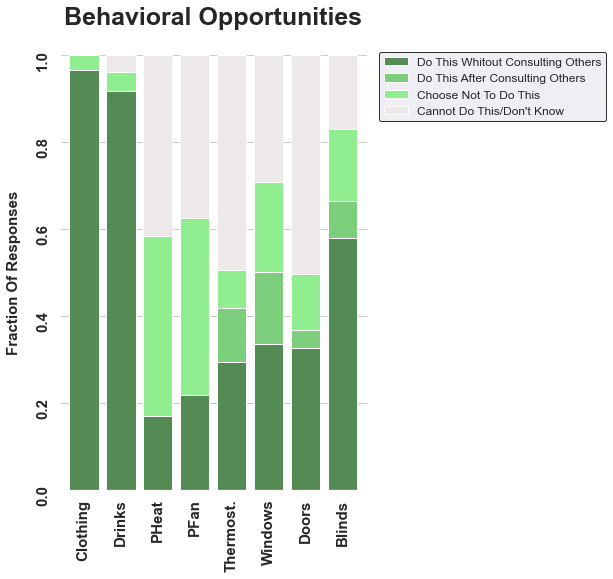

In [17]:
# creates a stacked bar plot
df_new.plot(kind='bar', stacked=True, color=['#548b54','#7ccd7c','#90ee90','#eee9e9'], position=0.5, width=0.8, figsize=(5.5,8))

plt.title('Behavioral Opportunities', fontsize = 25, fontweight="bold", pad=30)
# Setting the background color
ax = plt.axes()
ax.set_facecolor("white")
plt.legend(df_new.columns, loc='upper left', bbox_to_anchor=(1.02, 1.02), fontsize = 12, frameon=True, edgecolor='black')

# Manage axis look
sns.set(style='ticks')
sns.despine(ax=ax, offset=0) # the important part here

#Axis settings
plt.xticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylim(0, 1, 0.2)
plt.yticks(fontsize=15, rotation=90, fontweight="bold")
plt.ylabel('Fraction Of Responses', fontsize=15,fontweight="bold", labelpad=15)

plt.savefig('../OccupantBehaviorEnvironmentData/figures/BehavioralOpportunities.png', bbox_inches = 'tight', dpi=250)

# Generating Table - Occupant Sample Characteristics

Gender

In [18]:
dct_gdr = {1:'Male',2:'Female'}

gdr = pd.concat([round(df['2_gender'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_gender'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

gdr = gdr.rename(index=dct_gdr)
gdr['Category'] = gdr.index
gdr=gdr[['Category','N','% of final sample']]
#gdr.reset_index(drop=True)
gdr = gdr.rename(index={'Female':'Gender','Male':'Gender'})
gdr

,Category,N,% of final sample
Gender,Female,16,67
Gender,Male,8,33


Office Type

In [19]:
dct_off = {1:'Private',2:'Shared private',3:'Cubicle',4:'Open Desk',5:'Open Desk'}

off = pd.concat([round(df['2_off_type'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_off_type'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

off = off.rename(index=dct_off)
off['Category'] = off.index
off=off[['Category','N','% of final sample']]

off = off.groupby(by='Category', as_index=False).sum()
off = off.rename(index={0:'Office type',1:'Office type',2:'Office type',3:'Office type'})
off

,Category,N,% of final sample
Office type,Cubicle,10,42
Office type,Open Desk,5,21
Office type,Private,6,25
Office type,Shared private,3,12


Office Location

In [20]:
dct_loc = {1:'Core',2:'Perimeter'}

loc = pd.concat([round(df['2_loc_floor'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['2_loc_floor'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

loc = loc.rename(index=dct_loc)
loc['Category'] = loc.index
loc=loc[['Category','N','% of final sample']]

loc = loc.rename(index={'Perimeter':'Office location','Core':'Office location'})
loc

,Category,N,% of final sample
Office location,Perimeter,15,63
Office location,Core,9,37


Available controls

In [21]:
"""
0 = Don't Know ; 
1 = Not Allowed / Possible ; 
2 = I Can Do This, But Choose Not To; 
3 = I Do This But Generally Need to Consult Others First ; 
4 = I Do This Without Consulting Others
"""
dcy_ctr = {0:'not used',1:'not used',2:'not used',3:'used',4:'used'}

In [22]:
df['4_avail_lc_heater'].value_counts(normalize=True).mul(1)

2.0    0.414265
1.0    0.335386
4.0    0.169224
0.0    0.081124
Name: 4_avail_lc_heater, dtype: float64

In [23]:
df['4_avail_lc_fan'].value_counts(normalize=True).mul(1)

2.0    0.408314
1.0    0.252728
4.0    0.216768
0.0    0.122191
Name: 4_avail_lc_fan, dtype: float64

In [24]:
df['4_avail_thermostat'].value_counts(normalize=True).mul(1)

1.0    0.409047
4.0    0.294332
3.0    0.124187
2.0    0.086339
0.0    0.086096
Name: 4_avail_thermostat, dtype: float64

In [25]:
df['4_avail_window'].value_counts(normalize=True).mul(1)

4.0    0.335214
1.0    0.291921
2.0    0.208733
3.0    0.164132
Name: 4_avail_window, dtype: float64

In [26]:
df['4_avail_door'].value_counts(normalize=True).mul(1)

1.0    0.424095
4.0    0.324742
2.0    0.128033
0.0    0.081048
3.0    0.042082
Name: 4_avail_door, dtype: float64

In [27]:
df['4_avail_blinds'].value_counts(normalize=True).mul(1)

4.0    0.577974
2.0    0.166217
0.0    0.086415
3.0    0.084727
1.0    0.084667
Name: 4_avail_blinds, dtype: float64

Gen. thermal comfort

In [28]:
#1 = Very UNCOMF. ; 2 = UNCOMF. ; 3 = Somewhat UNCOMF. 4 = Somewhat COMF. ; 5 = COMF. ; 6 = Very COMF.
dct_comf = {1:'≥ Comfortable',2:'≥ Comfortable',3:'≥ Comfortable',
            4:'< Comfortable',5:'< Comfortable',6:'< Comfortable'}

comf = pd.concat([round(df['3_gen_th_cmf'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['3_gen_th_cmf'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

comf = comf.rename(index=dct_comf)
comf['Category'] = comf.index
comf=comf[['Category','N','% of final sample']]

comf = comf.groupby(by='Category', as_index=False).sum()
comf = comf.rename(index={0:'Gen. thermal comfort',1:'Gen. thermal comfort'})
comf

,Category,N,% of final sample
Gen. thermal comfort,< Comfortable,21,87
Gen. thermal comfort,≥ Comfortable,3,12


Gen. perceived ctl. satisfaction

In [29]:
#1 = Very DISSATISFIED ; 2 = DISSATISFIED ; 3 = Somewhat DISSATISFIED ; 4 = Somewhat SATISFIED ; 5 = SATISFIED ; 6 = Very SATISFIED
dct_sat = {1:'≥ Satisfied',2:'≥ Satisfied',3:'≥ Satisfied',
           4:'< Satisfied',5:'< Satisfied',6:'< Satisfied'}

sat = pd.concat([round(df['3_gen_satisf_wcontrol'].value_counts(normalize=True).mul(1)*24,0).astype(int),
                round(df['3_gen_satisf_wcontrol'].value_counts(normalize=True).mul(100),0).astype(int)],
                axis=1,keys=('N','% of final sample'))

sat = sat.rename(index=dct_sat)
sat['Category'] = sat.index
sat=sat[['Category','N','% of final sample']]

sat = sat.groupby(by='Category', as_index=False).sum()
sat = sat.rename(index={0:'Gen. perceived ctl. satisfaction',1:'Gen. perceived ctl. satisfaction'})
sat

,Category,N,% of final sample
Gen. perceived ctl. satisfaction,< Satisfied,6,25
Gen. perceived ctl. satisfaction,≥ Satisfied,18,76


MAIN TABLE CREATION

In [30]:
table_1 = pd.concat([gdr,off,loc,comf,sat])

In [31]:
table_1

,Category,N,% of final sample
Gender,Female,16,67
Gender,Male,8,33
Office type,Cubicle,10,42
Office type,Open Desk,5,21
Office type,Private,6,25
Office type,Shared private,3,12
Office location,Perimeter,15,63
Office location,Core,9,37
Gen. thermal comfort,< Comfortable,21,87
Gen. thermal comfort,≥ Comfortable,3,12
